In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from collections import deque
import numpy as np
import matplotlib.pyplot as plt

In [3]:
show_animation = True

In [4]:
# Define global variables
KP = 5.0 # attractive potential gain
RP = 100.0 # repulsive potential gain
AREA_WIDTH = 30.0 # potential area width
OSCILLATIONS_DETECTION_LENGTH = 3 # previous oscillation

In [5]:
def calc_potential_field(gx, gy, ox, oy, reso, rr, sx, sy):
    minx = min(min(ox), sx, gx) - AREA_WIDTH / 2.0
    miny = min(min(oy), sy, gy) - AREA_WIDTH / 2.0
    maxx = max(max(ox), sx, gx) + AREA_WIDTH / 2.0
    maxy = max(max(oy), sy, gy) + AREA_WIDTH / 2.0
    xw = int(round((maxx - minx) / reso))
    yw = int(round((maxy - miny) / reso))

    # calc each potential
    pmap = [[0.0 for i in range(yw)] for i in range(xw)]

    for ix in range(xw):
        x = ix * reso + minx

        for iy in range(yw):
            y = iy * reso + miny
            ug = calc_attractive_potential(x, y, gx, gy)
            uo = calc_repulsive_potential(x, y, ox, oy, rr)
            uf = ug + uo
            pmap[ix][iy] = uf

    return pmap, minx, miny

In [6]:
def calc_attractive_potential(x, y, gx, gy):
    return 0.5 * KP * np.hypot(x - gx, y - gy)

In [7]:
def calc_repulsive_potential(x, y, ox, oy, rr):
    # search nearest obstacle
    minid = -1
    dmin = float("inf")
    for i, _ in enumerate(ox):
        d = np.hypot(x - ox[i], y - oy[i])
        if dmin >= d:
            dmin = d
            minid = i

    # calc repulsive potential
    dq = np.hypot(x - ox[minid], y - oy[minid])

    if dq <= rr:
        if dq <= 0.1:
            dq = 0.1

        return 0.5 * RP * (1.0 / dq - 1.0 / rr) ** 2
    else:
        return 0.0

In [8]:
def get_motion_model():
    # dx, dy
    motion = [[1, 0],
              [0, 1],
              [-1, 0],
              [0, -1],
              [-1, -1],
              [-1, 1],
              [1, -1],
              [1, 1]]

    return motion

In [9]:
def oscillations_detection(previous_ids, ix, iy):
    previous_ids.append((ix, iy))

    if (len(previous_ids) > OSCILLATIONS_DETECTION_LENGTH):
        previous_ids.popleft()

    # check if contains any duplicates by copying into a set
    previous_ids_set = set()
    for index in previous_ids:
        if index in previous_ids_set:
            return True
        else:
            previous_ids_set.add(index)
    return False

In [10]:
def draw_heatmap(data):
    data = np.array(data).T
    plt.pcolor(data, vmax=100.0, cmap=plt.cm.Blues)

In [11]:
def potential_field_planning(sx, sy, gx, gy, ox, oy, reso, rr):

    # calc potential field
    pmap, minx, miny = calc_potential_field(gx, gy, ox, oy, reso, rr, sx, sy)

    # search path
    d = np.hypot(sx - gx, sy - gy)
    ix = round((sx - minx) / reso)
    iy = round((sy - miny) / reso)
    gix = round((gx - minx) / reso)
    giy = round((gy - miny) / reso)

    if show_animation:
        draw_heatmap(pmap)
        # for stopping simulation with the esc key.
        plt.gcf().canvas.mpl_connect('key_release_event',
                lambda event: [exit(0) if event.key == 'escape' else None])
        plt.plot(ix, iy, "*k")
        plt.plot(gix, giy, "*m")

    rx, ry = [sx], [sy]
    motion = get_motion_model()
    previous_ids = deque()

#     while d >= reso:
#         minp = float("inf")
#         minix, miniy = -1, -1
#         for i, _ in enumerate(motion):
#             inx = int(ix + motion[i][0])
#             iny = int(iy + motion[i][1])
#             if inx >= len(pmap) or iny >= len(pmap[0]) or inx < 0 or iny < 0:
#                 p = float("inf")  # outside area
#                 print("outside potential!")
#             else:
#                 p = pmap[inx][iny]
#             if minp > p:
#                 minp = p
#                 minix = inx
#                 miniy = iny
#         ix = minix
#         iy = miniy
#         xp = ix * reso + minx
#         yp = iy * reso + miny
#         d = np.hypot(gx - xp, gy - yp)
#         rx.append(xp)
#         ry.append(yp)

#         if (oscillations_detection(previous_ids, ix, iy)):
#             print("Oscillation detected at ({},{})!".format(ix, iy))
#             break

        #if show_animation:
        #    plt.plot(ix, iy, ".r")
        #    plt.pause(0.01)

    print("Goal!!")

    return rx, ry

Goal!!


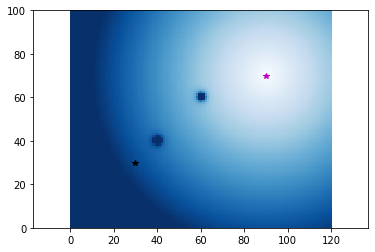

In [12]:
sx = 0.0  # start x position [m]
sy = 10.0  # start y positon [m]
gx = 30.0  # goal x position [m]
gy = 30.0  # goal y position [m]
grid_size = 0.5  # potential grid size [m]
robot_radius = 5.0  # robot radius [m]

ox = [15.0, 5.0]#, 20.0, 25.0]  # obstacle x position list [m]
oy = [25.0, 15.0]#, 26.0, 25.0]  # obstacle y position list [m]

if show_animation:
    plt.grid(True)
    plt.axis("equal")

# path generation
_, _ = potential_field_planning(
    sx, sy, gx, gy, ox, oy, grid_size, robot_radius)

if show_animation:
    plt.show()

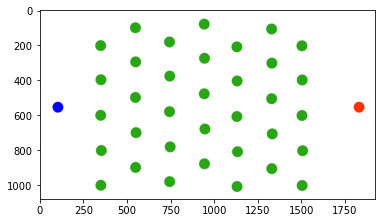

In [13]:
import cv2
globalMap = cv2.imread( "./upload_dir/b3898d0e-ea1c-434b-b9b5-f354cead4217.jpg" )
plt.imshow( globalMap )

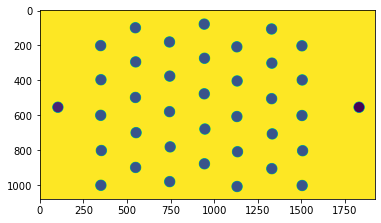

In [14]:
gray = cv2.cvtColor( globalMap, cv2.COLOR_BGR2GRAY )
plt.imshow( gray )

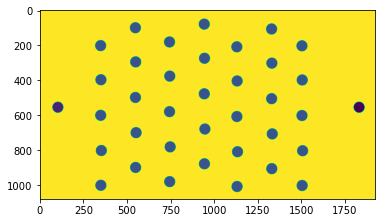

In [15]:
# detect circles
gray_blured = cv2.blur( gray, (3, 3) )
plt.imshow( gray_blured )

In [16]:


obstacles = []
index     = 0
import numpy as np
detected_circles = cv2.HoughCircles( gray_blured, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=1, maxRadius=40 )
if detected_circles is not None:
    detected_circles = np.uint16( np.around( detected_circles ) )
    for pt in detected_circles[0, :]:
        a, b, r = pt[0], pt[1], pt[2]
        pos = (a, b)
        
        # border outline
        cv2.circle( globalMap, center=(a, b), radius=r, color=( 0, 0, 0 ), thickness=1 )
        obstacles.append( {
            "x" : a,
            "y" : b,
            "r" : r
        } )
        
        # create labels
        cv2.putText(globalMap, text=str(index), org=(a,b),
            fontFace= cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(0,0,0),
            thickness=2, lineType=cv2.LINE_AA)
        
        index+=1



# Show Map

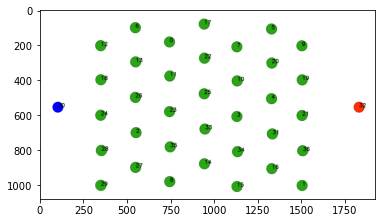

In [17]:
# show cirlces tracking
plt.imshow( globalMap )

In [18]:
import pandas as pd
df = pd.DataFrame( obstacles )
df.head(5)

,x,y,r
0,742,182,31
1,1502,1002,31
2,550,700,31
3,1128,608,31
4,1326,506,31


In [19]:
# get coordinate of a given index
def get_coordinate( index ):
    try:
        return obstacles[ index ]
    except IndexError:
        return {}

In [20]:
start_point = 0
end_point   = 36

start = get_coordinate(start_point)
end   = get_coordinate(end_point)

In [21]:
print( start, end )

{'x': 742, 'y': 182, 'r': 31} {'x': 1506, 'y': 804, 'r': 31}


In [22]:
start_x = start['x']
start_y = start['y']
goal_x  = end['x']
goal_y  = end['y']

In [23]:
ox = []
oy = []

count = 0
for index, obj in enumerate(obstacles):
    if count == 10:
        break
    if index != start_point and index != end_point:
        ox.append( obj['x'] )
        oy.append( obj['y'] )
        count+=1

In [24]:
print( ox, oy )

[1502, 550, 1128, 1326, 1326, 546, 1128, 744, 1500, 1130] [1002, 700, 608, 506, 108, 100, 210, 980, 204, 404]


/tmp/ipykernel_75394/1151371171.py:7: RuntimeWarning: overflow encountered in ushort_scalars
  d = np.hypot(sx - gx, sy - gy)


Goal!!


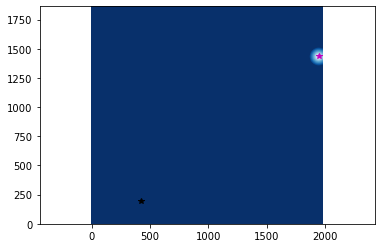

In [25]:
if show_animation:
    plt.grid(True)
    plt.axis('equal')
#path generation
_, _ = potential_field_planning(
    start_x, start_y, goal_x, goal_y, ox, oy, grid_size, robot_radius)
if show_animation:
    plt.show()